<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Classification with Python

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Confidently create classification models


In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [ ]:
pip install threadpoolctl==3.1.0

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes the following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


### Load Data From CSV File


Let's load the dataset \[NB Need to provide link to csv file]


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df.shape

(1406, 24)

## Add Column

Next we'll add a column that will contain "true" if the wins above bubble are over 7 and "false" if not. We'll call this column Win Index or "windex" for short.


In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

# Data visualization and pre-processing


Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the post season. We'll also create a new dataframe that will hold the values with the new column.


In [5]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [6]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons.


Lets plot some columns to underestand the data better:


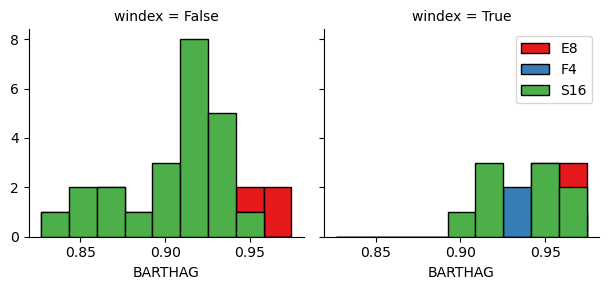

In [7]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

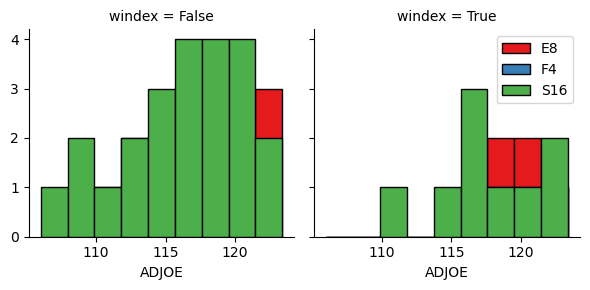

In [8]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Lets look at how Adjusted Defense Efficiency plots


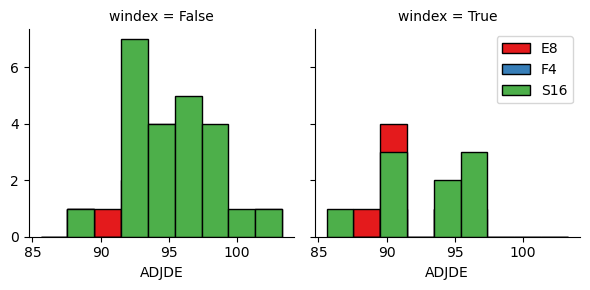

In [9]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that this data point doesn't impact the ability of a team to get into the Final Four.


## Convert Categorical features to numerical values


Lets look at the postseason:


In [10]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.


Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:


In [11]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Users\ClearNotePlus\anaconda3\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


### Feature selection


Let's define feature sets, X:


In [12]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|


In [13]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data


Data Standardization gives data zero mean and unit variance (technically should be done after train test split )


In [14]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

## Training and Validation


Split the data into Training and Validation data.


In [15]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


# K Nearest Neighbor(KNN)

<b>Question  1 </b> Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)


You can use <code> accuracy_score</cdoe>


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#First, I set K-value:
k = 5
#We now train the model:  
KnnBasket = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KnnBasket

KNeighborsClassifier()

In [18]:
#Now, we predict the values with the validation dataset:
y_hat_knn = KnnBasket.predict(X_val)
y_hat_knn[0:5]

array(['S16', 'S16', 'S16', 'E8', 'E8'], dtype=object)

In [19]:
#Now, we set some accuracy metrics
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KnnBasket.predict(X_train)))
print("Validation set Accuracy: ", metrics.accuracy_score(y_val, y_hat_knn))

#As we can see, Validation set has a superior level of accuray than the train set,
#hence, the model doesn´t shows neither underfitting or overfitting

Train set Accuracy:  0.6363636363636364
Validation set Accuracy:  0.6666666666666666


<b>Question  2</b> Determine and print the accuracy for the first 15 values of k on the validation data:


In [20]:
#Now, we set the loop for calculating the different accuracy measures on different values of K:
Ks = 16
mean_acc_Kn = np.zeros((Ks-1))
std_acc_Kn = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    KnnBasket_15Ks = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat_knn_15Ks =KnnBasket_15Ks.predict(X_val)
    mean_acc_Kn[n-1] = metrics.accuracy_score(y_val, y_hat_knn_15Ks)

    
    std_acc_Kn[n-1]=np.std(y_hat_knn_15Ks==y_val)/np.sqrt(y_hat_knn_15Ks.shape[0])

mean_acc_Kn

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333, 0.58333333])

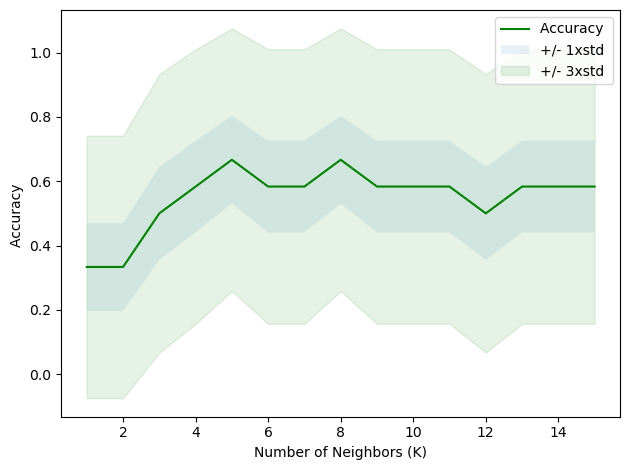

In [21]:
#Just for having a visual help, we´ll plot the results:
plt.plot(range(1,Ks),mean_acc_Kn,'g')
plt.fill_between(range(1,Ks),mean_acc_Kn - 1 * std_acc_Kn,mean_acc_Kn + 1 * std_acc_Kn, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc_Kn - 3 * std_acc_Kn,mean_acc_Kn + 3 * std_acc_Kn, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
#Hence:
print( "The best accuracy was with", mean_acc_Kn.max(), "with k=", mean_acc_Kn.argmax()+1) 

The best accuracy was with 0.6666666666666666 with k= 5


# Decision Tree


The following lines of code fit a <code>DecisionTreeClassifier</code>:


In [23]:
from sklearn.tree import DecisionTreeClassifier

<b>Question  3</b> Determine the minumum   value for the parameter <code>max_depth</code> that improves results


In [24]:
#Now, we set the loop for calculating the different accuracy measures on different values of max_depth:
Depths = 31
mean_acc_tree = np.zeros((Depths-1))
std_acc_tree = np.zeros((Depths-1))

for n in range(1,Depths):
    
    #Train Model and Predict  
    TreeBasket_Dephts = DecisionTreeClassifier(criterion="entropy", max_depth = Depths).fit(X_train,y_train)
    y_hat_Tree_Dephts =TreeBasket_Dephts.predict(X_val)
    mean_acc_tree[n-1] = metrics.accuracy_score(y_val, y_hat_Tree_Dephts)

    
    std_acc_tree[n-1]=np.std(y_hat_Tree_Dephts==y_val)/np.sqrt(y_hat_Tree_Dephts.shape[0])

mean_acc_tree

array([0.5       , 0.5       , 0.41666667, 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.5       , 0.41666667, 0.41666667,
       0.41666667, 0.5       , 0.5       , 0.41666667, 0.41666667,
       0.5       , 0.41666667, 0.5       , 0.5       , 0.41666667,
       0.41666667, 0.5       , 0.5       , 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.5       , 0.5       , 0.5       ])

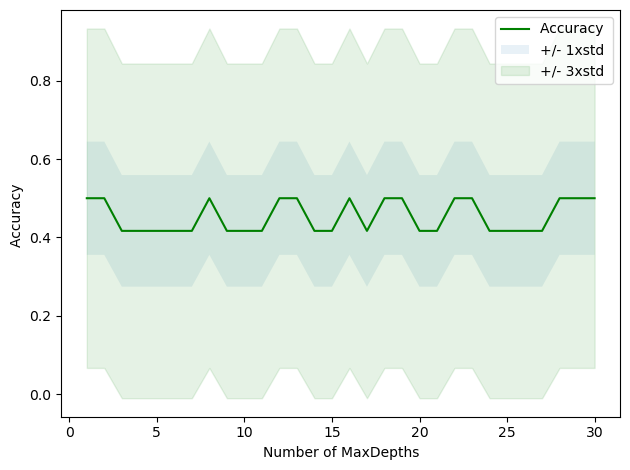

In [25]:
#Just for having a visual help, we´ll plot the results:
plt.plot(range(1,Depths),mean_acc_tree,'g')
plt.fill_between(range(1,Depths),mean_acc_tree - 1 * std_acc_tree,mean_acc_tree + 1 * std_acc_tree, alpha=0.10)
plt.fill_between(range(1,Depths),mean_acc_tree - 3 * std_acc_tree,mean_acc_tree + 3 * std_acc_tree, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of MaxDepths')
plt.tight_layout()
plt.show()

In [26]:
#Hence:
print( "The best accuracy was with", mean_acc_tree.max(), "with a minimum value of Max_Depth =", mean_acc_tree.argmax()+1)

The best accuracy was with 0.5 with a minimum value of Max_Depth = 1


>>>I noted that when the Tree algorithm is run several times, the order of the scores depending on Depths changes, but the accuracy values are mantained.
This is due to the nature of the Decision Tree Algorithm that randomly chooses the order of features for doing the clasification procedure each time is run.

# Support Vector Machine


<b>Question  4</b> Train the support  vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.


In [27]:
from sklearn import svm

In [28]:
#Setting the SVM_linear:
SVMBasket_linear = svm.SVC(kernel='linear')
SVMBasket_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
#Predicting the SVM_linear values in the validation set:
y_hat_SVM_linear = SVMBasket_linear.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_SVM_linear[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'E8' 'S16' 'E8' 'E8']


In [30]:
#Setting the SVM_poly:
SVMBasket_poly = svm.SVC(kernel='poly')
SVMBasket_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [31]:
#Predicting the SVM_poly values in the validation set:
y_hat_SVM_poly = SVMBasket_poly.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_SVM_poly[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'S16' 'S16' 'S16' 'S16']


In [32]:
#Setting the SVM_rbf:
SVMBasket_rbf = svm.SVC(kernel='rbf')
SVMBasket_rbf.fit(X_train, y_train)

SVC()

In [33]:
#Predicting the SVM_rbf values in the validation set:
y_hat_SVM_rbf = SVMBasket_rbf.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_SVM_rbf[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'S16' 'S16' 'S16' 'E8']


In [34]:
#Setting the SVM_sigmoid:
SVMBasket_sigmoid = svm.SVC(kernel='sigmoid')
SVMBasket_sigmoid.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [35]:
#Predicting the SVM_sigmoid values in the validation set:
y_hat_SVM_sigmoid = SVMBasket_sigmoid.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_SVM_sigmoid[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'S16' 'S16' 'E8' 'E8']


In [36]:
#Setting the accuracy levels for each variation of SVM:
SVMBasket_linear_acc = accuracy_score(y_val,y_hat_SVM_linear)
SVMBasket_poly_acc = accuracy_score(y_val,y_hat_SVM_poly)
SVMBasket_rbf_acc = accuracy_score(y_val,y_hat_SVM_rbf)
SVMBasket_sigmoid_acc = accuracy_score(y_val,y_hat_SVM_sigmoid)

In [37]:
#Now, the accuray levels for each SVM variation is:
print('The accuracy levels are:')
print('For lineal Kernel: ', "%.2f" % (SVMBasket_linear_acc*100))
print('For poly Kernel: ', "%.2f" % (SVMBasket_poly_acc*100))
print('For rbf Kernel: ', "%.2f" % (SVMBasket_rbf_acc*100))
print('For sigmoid Kernel: ', "%.2f" % (SVMBasket_sigmoid_acc*100))

The accuracy levels are:
For lineal Kernel:  25.00
For poly Kernel:  66.67
For rbf Kernel:  58.33
For sigmoid Kernel:  58.33


>>> Here can be noted that for this particular problem, the POLY kernel variation of SVM is the most appropriate with the accuracy score.

# Logistic Regression


<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
#Setting the Logaristic Regression solved with newton-cg:
LogRegBasket_Newton = LogisticRegression(C = 0.01, solver = 'newton-cg').fit(X_train,y_train)
LogRegBasket_Newton

LogisticRegression(C=0.01, solver='newton-cg')

In [40]:
#Predicting theLogistic Regression values solved with newton-cg in the validation set:
y_hat_LogReg_Newton = LogRegBasket_Newton.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_LogReg_Newton[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'S16' 'S16' 'E8' 'S16']


In [41]:
#Setting the Logaristic Regression solved with lbfgs:
LogRegBasket_lbfgs = LogisticRegression(C = 0.01, solver = 'lbfgs').fit(X_train,y_train)
LogRegBasket_lbfgs

LogisticRegression(C=0.01)

In [42]:
#Predicting theLogistic Regression values solved with lbfgs in the validation set:
y_hat_LogReg_lbfgs = LogRegBasket_lbfgs.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_LogReg_lbfgs[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'S16' 'S16' 'E8' 'S16']


In [43]:
#Setting the Logaristic Regression solved with liblinear:
LogRegBasket_liblinear = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train,y_train)
LogRegBasket_liblinear

LogisticRegression(C=0.01, solver='liblinear')

In [44]:
#Predicting theLogistic Regression values solved with liblinear in the validation set:
y_hat_LogReg_liblinear = LogRegBasket_liblinear.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_LogReg_liblinear[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['F4' 'S16' 'E8' 'E8' 'E8']


In [45]:
#Setting the Logaristic Regression solved with sag:
LogRegBasket_sag = LogisticRegression(C = 0.01, solver = 'sag').fit(X_train,y_train)
LogRegBasket_sag

LogisticRegression(C=0.01, solver='sag')

In [46]:
#Predicting theLogistic Regression values solved with sag in the validation set:
y_hat_LogReg_sag = LogRegBasket_sag.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_LogReg_sag[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'S16' 'S16' 'E8' 'S16']


In [47]:
#Setting the Logaristic Regression solved with saga:
LogRegBasket_saga = LogisticRegression(C = 0.01, solver = 'saga').fit(X_train,y_train)
LogRegBasket_saga

LogisticRegression(C=0.01, solver='saga')

In [48]:
#Predicting theLogistic Regression values solved with sag in the validation set:
y_hat_LogReg_saga = LogRegBasket_saga.predict(X_val)
print("Some of the real Objective Variable values are:",y_val[0:5])
print("Some of the predicted Objective Variable values are:",y_hat_LogReg_saga[0:5])

Some of the real Objective Variable values are: ['F4' 'S16' 'S16' 'S16' 'S16']
Some of the predicted Objective Variable values are: ['S16' 'S16' 'S16' 'E8' 'S16']


In [49]:
#Setting the accuracy levels for each variation of Logistic Regression:
LogRegBasket_Newton_acc = accuracy_score(y_val,y_hat_LogReg_Newton)
LogRegBasket_lbfgs_acc = accuracy_score(y_val,y_hat_LogReg_lbfgs)
LogRegBasket_liblinear_acc = accuracy_score(y_val,y_hat_LogReg_liblinear)
LogRegBasket_sag_acc = accuracy_score(y_val,y_hat_LogReg_sag)
LogRegBasket_saga_acc = accuracy_score(y_val,y_hat_LogReg_saga)

In [50]:
#Now, the accuray levels for each Logistic Regression is:
print('The accuracy levels are:')
print('For newton-cg Solver: ', "%.2f" % (LogRegBasket_Newton_acc*100))
print('For lbfgs Solver: ', "%.2f" % (LogRegBasket_lbfgs_acc*100))
print('For liblinear Solver: ', "%.2f" % (LogRegBasket_liblinear_acc*100))
print('For sag Solver: ', "%.2f" % (LogRegBasket_sag_acc*100))
print('For saga Solver: ', "%.2f" % (LogRegBasket_saga_acc*100))

The accuracy levels are:
For newton-cg Solver:  58.33
For lbfgs Solver:  58.33
For liblinear Solver:  58.33
For sag Solver:  58.33
For saga Solver:  58.33


> Here can be seen that, for this problem, the SAME ACCURACY SCORE results for each Logistic Regression Variation. Hence, we must use the <b>Log Loss Score</b> for a better understanding of the accuracy level in Logistic Regression.

In [51]:
from sklearn.metrics import log_loss

In [52]:
y_hat_prob_Newton = LogRegBasket_Newton.predict_proba(X_val)
y_hat_prob_lbfgs = LogRegBasket_lbfgs.predict_proba(X_val)
y_hat_prob_liblinear = LogRegBasket_liblinear.predict_proba(X_val)
y_hat_prob_sag = LogRegBasket_sag.predict_proba(X_val)
y_hat_prob_saga = LogRegBasket_saga.predict_proba(X_val)

In [53]:
#Setting the accuracy levels for each variation of Logistic Regression:
LogRegBasket_Newton_LogLoss = log_loss(y_val,y_hat_prob_Newton)
LogRegBasket_lbfgs_LogLoss = log_loss(y_val,y_hat_prob_lbfgs)
LogRegBasket_liblinear_LogLoss = log_loss(y_val,y_hat_prob_liblinear)
LogRegBasket_sag_LogLoss = log_loss(y_val,y_hat_prob_sag)
LogRegBasket_saga_LogLoss = log_loss(y_val,y_hat_prob_saga)

In [54]:
#Now, the accuray levels for each Logistic Regression is:
print('The Log Loss levels are:')
print('For newton-cg Solver: ', "%.4f" % (LogRegBasket_Newton_LogLoss*100))
print('For lbfgs Solver: ', "%.4f" % (LogRegBasket_lbfgs_LogLoss*100))
print('For liblinear Solver: ', "%.4f" % (LogRegBasket_liblinear_LogLoss*100))
print('For sag Solver: ', "%.4f" % (LogRegBasket_sag_LogLoss*100))
print('For saga Solver: ', "%.4f" % (LogRegBasket_saga_LogLoss*100))

The Log Loss levels are:
For newton-cg Solver:  93.4726
For lbfgs Solver:  93.4728
For liblinear Solver:  109.5461
For sag Solver:  93.4716
For saga Solver:  93.4660


>>Here is noted that <b>SAGA SOLVER</b> is the most accurate for very little, nevertheless, this is the one to be choosen.

# Model Evaluation using Test set


In [55]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [56]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

<b>Question  5</b> Calculate the  F1 score and Jaccard score for each model from above. Use the Hyperparameter that performed best on the validation data. **For f1\_score please set the average parameter to 'micro'.**


>><b>KNN:</b>

In [57]:
#Setting the  F1 SCORE for KNN:
Ks = 16
mean_f1_Kn = np.zeros((Ks-1))
std_f1_Kn = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    KnnBasket_15Ks = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat_knn_15Ks =KnnBasket_15Ks.predict(X_val)
    mean_f1_Kn[n-1] = metrics.f1_score(y_val, y_hat_knn_15Ks, average= 'micro')

    
    std_f1_Kn[n-1]=np.std(y_hat_knn_15Ks==y_val)/np.sqrt(y_hat_knn_15Ks.shape[0])

mean_f1_Kn

array([0.33333333, 0.33333333, 0.5       , 0.58333333, 0.66666667,
       0.58333333, 0.58333333, 0.66666667, 0.58333333, 0.58333333,
       0.58333333, 0.5       , 0.58333333, 0.58333333, 0.58333333])

In [58]:
#Setting the  JACCARD SCORE for KNN:
Ks = 16
mean_jcc_Kn = np.zeros((Ks-1))
std_jcc_Kn = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    KnnBasket_15Ks = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_hat_knn_15Ks =KnnBasket_15Ks.predict(X_val)
    mean_jcc_Kn[n-1] = metrics.jaccard_score(y_val, y_hat_knn_15Ks, average= 'micro')

    
    std_jcc_Kn[n-1]=np.std(y_hat_knn_15Ks==y_val)/np.sqrt(y_hat_knn_15Ks.shape[0])

mean_jcc_Kn

array([0.2       , 0.2       , 0.33333333, 0.41176471, 0.5       ,
       0.41176471, 0.41176471, 0.5       , 0.41176471, 0.41176471,
       0.41176471, 0.33333333, 0.41176471, 0.41176471, 0.41176471])

In [59]:
#Hence:
print( "The best F1_SCORE accuracy was with", mean_f1_Kn.max(), "with k=", mean_f1_Kn.argmax()+1) 
print( "The best JACCARD SCORE accuracy was with", mean_jcc_Kn.max(), "with k=", mean_jcc_Kn.argmax()+1) 

The best F1_SCORE accuracy was with 0.6666666666666666 with k= 5
The best JACCARD SCORE accuracy was with 0.5 with k= 5


>><b>Decision Tree:</b>

In [60]:
#Setting the  F1 SCORE for Decision Tree:
Depths = 31
mean_f1_tree = np.zeros((Depths-1))
std_f1_tree = np.zeros((Depths-1))

for n in range(1,Depths):
    
    #Train Model and Predict  
    TreeBasket_Dephts = DecisionTreeClassifier(criterion="entropy", max_depth = Depths).fit(X_train,y_train)
    y_hat_Tree_Dephts =TreeBasket_Dephts.predict(X_val)
    mean_f1_tree[n-1] = metrics.f1_score(y_val, y_hat_Tree_Dephts, average= 'micro')

    
    std_f1_tree[n-1]=np.std(y_hat_Tree_Dephts==y_val)/np.sqrt(y_hat_Tree_Dephts.shape[0])

mean_f1_tree

array([0.5       , 0.5       , 0.41666667, 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.41666667,
       0.5       , 0.41666667, 0.5       , 0.5       , 0.41666667,
       0.5       , 0.41666667, 0.41666667, 0.5       , 0.41666667,
       0.5       , 0.41666667, 0.5       , 0.41666667, 0.41666667])

In [61]:
#Setting the  JACCARD SCORE for Decision Tree:
Depths = 31
mean_jcc_tree = np.zeros((Depths-1))
std_jcc_tree = np.zeros((Depths-1))

for n in range(1,Depths):
    
    #Train Model and Predict  
    TreeBasket_Dephts = DecisionTreeClassifier(criterion="entropy", max_depth = Depths).fit(X_train,y_train)
    y_hat_Tree_Dephts =TreeBasket_Dephts.predict(X_val)
    mean_jcc_tree[n-1] = metrics.jaccard_score(y_val, y_hat_Tree_Dephts, average = 'micro')
    
    std_jcc_tree[n-1]=np.std(y_hat_Tree_Dephts==y_val)/np.sqrt(y_hat_Tree_Dephts.shape[0])

mean_jcc_tree

array([0.33333333, 0.33333333, 0.26315789, 0.33333333, 0.26315789,
       0.33333333, 0.33333333, 0.26315789, 0.26315789, 0.33333333,
       0.33333333, 0.26315789, 0.26315789, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.26315789, 0.26315789,
       0.26315789, 0.26315789, 0.33333333, 0.33333333, 0.33333333,
       0.26315789, 0.26315789, 0.33333333, 0.26315789, 0.26315789])

In [62]:
#Hence:
print( "The best F1_SCORE accuracy was with", mean_f1_tree.max(), "with k=", mean_f1_tree.argmax()+1) 
print( "The best JACCARD SCORE accuracy was with", mean_jcc_tree.max(), "with k=", mean_jcc_tree.argmax()+1)

The best F1_SCORE accuracy was with 0.5 with k= 1
The best JACCARD SCORE accuracy was with 0.3333333333333333 with k= 1


<b>For the nature of decision tree explained in the end of POINT 6, the ideal model will be iterated with this optimal hyperparameter until the maximum value of accuracy is achieved. </b>

>><b>SVM:

In [63]:
#Setting the  F1 SCORE for Decision Tree:
SVMBasket_linear_f1 = f1_score(y_val, y_hat_SVM_linear, average='micro') 
SVMBasket_poly_f1 =  f1_score(y_val, y_hat_SVM_poly, average='micro')
SVMBasket_rbf_f1 =  f1_score(y_val, y_hat_SVM_rbf, average='micro')
SVMBasket_sigmoid_f1 =  f1_score(y_val, y_hat_SVM_sigmoid, average='micro')

In [64]:
#Now, the f1_score accuray levels for each SVM variation is:
print('The f1_score accuracy levels are:')
print('For lineal Kernel: ', "%.2f" % (SVMBasket_linear_f1*100))
print('For poly Kernel: ', "%.2f" % (SVMBasket_poly_f1*100))
print('For rbf Kernel: ', "%.2f" % (SVMBasket_rbf_f1*100))
print('For sigmoid Kernel: ', "%.2f" % (SVMBasket_sigmoid_f1*100))

The f1_score accuracy levels are:
For lineal Kernel:  25.00
For poly Kernel:  66.67
For rbf Kernel:  58.33
For sigmoid Kernel:  58.33


In [65]:
#Setting the  F1 SCORE for Decision Tree:
SVMBasket_linear_jcc = metrics.jaccard_score(y_val, y_hat_SVM_linear, average='micro') 
SVMBasket_poly_jcc =  metrics.jaccard_score(y_val, y_hat_SVM_poly, average='micro')
SVMBasket_rbf_jcc =  metrics.jaccard_score(y_val, y_hat_SVM_rbf, average='micro')
SVMBasket_sigmoid_jcc =  metrics.jaccard_score(y_val, y_hat_SVM_sigmoid, average='micro')

In [66]:
#Now, the f1_score accuray levels for each SVM variation is:
print('The f1_score accuracy levels are:')
print('For lineal Kernel: ', "%.2f" % (SVMBasket_linear_jcc*100))
print('For poly Kernel: ', "%.2f" % (SVMBasket_poly_jcc*100))
print('For rbf Kernel: ', "%.2f" % (SVMBasket_rbf_jcc*100))
print('For sigmoid Kernel: ', "%.2f" % (SVMBasket_sigmoid_jcc*100))

The f1_score accuracy levels are:
For lineal Kernel:  14.29
For poly Kernel:  50.00
For rbf Kernel:  41.18
For sigmoid Kernel:  41.18


Hence, the ideal HYPERPARAMETER on kernel tune is <b>POLY</b>

>><b>Logistig Regression</b>

In [67]:
#Setting the accuracy levels for each variation of Logistic Regression:
LogRegBasket_Newton_f1 = f1_score(y_val,y_hat_LogReg_Newton, average = 'micro')
LogRegBasket_lbfgs_f1 = f1_score(y_val,y_hat_LogReg_lbfgs, average = 'micro')
LogRegBasket_liblinear_f1 = f1_score(y_val,y_hat_LogReg_liblinear, average = 'micro')
LogRegBasket_sag_f1 = f1_score(y_val,y_hat_LogReg_sag, average = 'micro')
LogRegBasket_saga_f1 = f1_score(y_val,y_hat_LogReg_saga, average = 'micro')

In [68]:
#Now, the accuray levels for each Logistic Regression is:
print('The accuracy levels are:')
print('For newton-cg Solver: ', "%.2f" % (LogRegBasket_Newton_f1*100))
print('For lbfgs Solver: ', "%.2f" % (LogRegBasket_lbfgs_f1*100))
print('For liblinear Solver: ', "%.2f" % (LogRegBasket_liblinear_f1*100))
print('For sag Solver: ', "%.2f" % (LogRegBasket_sag_f1*100))
print('For saga Solver: ', "%.2f" % (LogRegBasket_saga_f1*100))

The accuracy levels are:
For newton-cg Solver:  58.33
For lbfgs Solver:  58.33
For liblinear Solver:  58.33
For sag Solver:  58.33
For saga Solver:  58.33


In [69]:
#Setting the accuracy levels for each variation of Logistic Regression:
LogRegBasket_Newton_jcc = metrics.jaccard_score(y_val,y_hat_LogReg_Newton, average = 'micro')
LogRegBasket_lbfgs_jcc = metrics.jaccard_score(y_val,y_hat_LogReg_lbfgs, average = 'micro')
LogRegBasket_liblinear_jcc = metrics.jaccard_score(y_val,y_hat_LogReg_liblinear, average = 'micro')
LogRegBasket_sag_jcc = metrics.jaccard_score(y_val,y_hat_LogReg_sag, average = 'micro')
LogRegBasket_saga_jcc = metrics.jaccard_score(y_val,y_hat_LogReg_saga, average = 'micro')

In [70]:
#Now, the accuray levels for each Logistic Regression is:
print('The accuracy levels are:')
print('For newton-cg Solver: ', "%.2f" % (LogRegBasket_Newton_jcc*100))
print('For lbfgs Solver: ', "%.2f" % (LogRegBasket_lbfgs_jcc*100))
print('For liblinear Solver: ', "%.2f" % (LogRegBasket_liblinear_jcc*100))
print('For sag Solver: ', "%.2f" % (LogRegBasket_sag_jcc*100))
print('For saga Solver: ', "%.2f" % (LogRegBasket_saga_jcc*100))

The accuracy levels are:
For newton-cg Solver:  41.18
For lbfgs Solver:  41.18
For liblinear Solver:  41.18
For sag Solver:  41.18
For saga Solver:  41.18


>In here, there is <b>no difference in both F1 and JACCARD scores among the different Hyperparameters on Solver methods</b> in Logistic Regression, hence, we can asume that <b>these are not the best measures</b> for determinating accuracy of Logistic Regression; in that sense, I'm going to use the <b>LOG LOSS</b> measure from <b>POINT 8</b> for setting the <b>SAGA Solver</b> Hyperparameter in the final test set.

### Load Test set for evaluation


In [71]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0120ENv3/Dataset/ML0101EN_EDX_skill_up/basketball_train.csv',error_bad_lines=False)
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [72]:
test_df.shape

(1757, 24)

In [73]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\ClearNotePlus\anaconda3\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [74]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [75]:
print ('test set:', test_X.shape,  test_y.shape)

test set: (70, 21) (70,)


<b>KNN


In [76]:
#First, I set Optimal K-value with F1 Score since is the same than Jaccard Score:
K_opt = mean_f1_Kn.argmax()+1
#We now train the model:  
KnnBasket_Opt = KNeighborsClassifier(n_neighbors = K_opt).fit(X_train,y_train)
KnnBasket_Opt

KNeighborsClassifier()

In [77]:
#Now, we predict the values with the test dataset:
y_hat_knn_test_Opt = KnnBasket_Opt.predict(test_X)
y_hat_knn_test_Opt[0:5]

array(['S16', 'S16', 'E8', 'E8', 'E8'], dtype=object)

In [93]:
#Now, we set some accuracy metrics:
print("Train set Accuracy: ", "%.4f" % metrics.accuracy_score(y_train, KnnBasket_Opt.predict(X_train)))
print("Test set Accuracy: ", "%.4f" % metrics.accuracy_score(test_y, y_hat_knn_test_Opt))
print("Test set F1 Score: ", "%.4f" % metrics.f1_score(test_y, y_hat_knn_test_Opt, average = 'micro'))
print("Test set Jaccard Score: ", "%.4f" % metrics.jaccard_score(test_y, y_hat_knn_test_Opt, average = 'micro'))

Train set Accuracy:  0.6364
Test set Accuracy:  0.6286
Test set F1 Score:  0.6286
Test set Jaccard Score:  0.4583


<b>Decision Tree


In [79]:
#First, I set Optimal K-value with F1 Score since is the same than Jaccard Score:
Depth_Opt = mean_f1_tree.argmax()+1
#We now train the model:  
TreeBasket_Opt = DecisionTreeClassifier(criterion="entropy", max_depth = Depth_Opt).fit(X_train,y_train)
TreeBasket_Opt

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [80]:
#Now, we predict the values with the test dataset:
y_hat_Tree_test_Opt = TreeBasket_Opt.predict(test_X)
y_hat_Tree_test_Opt[0:5]

array(['S16', 'E8', 'E8', 'E8', 'S16'], dtype=object)

In [94]:
#Now, we set some accuracy metrics:
print("Train set Accuracy: ", "%.4f" % metrics.accuracy_score(y_train, TreeBasket_Opt.predict(X_train)))
print("Test set Accuracy: ", "%.4f" % metrics.accuracy_score(test_y, y_hat_Tree_test_Opt))
print("Test set F1 Score: ", "%.4f" % metrics.f1_score(test_y, y_hat_Tree_test_Opt, average = 'micro'))
print("Test set Jaccard Score: ", "%.4f" % metrics.jaccard_score(test_y, y_hat_Tree_test_Opt, average = 'micro'))

Train set Accuracy:  0.6591
Test set Accuracy:  0.6429
Test set F1 Score:  0.6429
Test set Jaccard Score:  0.4737


<b>SVM


In [82]:
#Setting the optimum kernel mode SVM_poly:
SVMBasket_Opt = svm.SVC(kernel='poly')
SVMBasket_Opt.fit(X_train, y_train)

SVC(kernel='poly')

In [83]:
y_hat_SVM_test_Opt = SVMBasket_Opt.predict(test_X)
y_hat_SVM_test_Opt[0:5]

array(['E8', 'S16', 'S16', 'S16', 'S16'], dtype=object)

In [95]:
#Now, we set some accuracy metrics:
print("Train set Accuracy: ", "%.4f" % metrics.accuracy_score(y_train, SVMBasket_Opt.predict(X_train)))
print("Test set Accuracy: ", "%.4f" % metrics.accuracy_score(test_y, y_hat_SVM_test_Opt))
print("Test set F1 Score: ", "%.4f" % metrics.f1_score(test_y, y_hat_SVM_test_Opt, average = 'micro'))
print("Test set Jaccard Score: ", "%.4f" % metrics.jaccard_score(test_y, y_hat_SVM_test_Opt, average = 'micro'))

Train set Accuracy:  0.7500
Test set Accuracy:  0.6857
Test set F1 Score:  0.6857
Test set Jaccard Score:  0.5217


<b>Logistic Regression


In [85]:
#Setting the Logaristic Regression solved with the Optimal Solver Method:
LogRegBasket_Opt = LogisticRegression(C = 0.01, solver = 'saga').fit(X_train,y_train)
LogRegBasket_Opt

LogisticRegression(C=0.01, solver='saga')

In [86]:
y_hat_LogReg_test_Opt = LogRegBasket_saga.predict(test_X)
y_hat_LogReg_test_Opt[0:5]

array(['S16', 'S16', 'S16', 'S16', 'S16'], dtype=object)

In [87]:
y_hat_prob_test_Opt = LogRegBasket_saga.predict_proba(test_X)
y_hat_prob_test_Opt[0:5]

array([[0.25260558, 0.10418483, 0.64320959],
       [0.31550547, 0.13123051, 0.55326402],
       [0.38031621, 0.15911097, 0.46057282],
       [0.4025931 , 0.13283174, 0.46457517],
       [0.29122908, 0.16351446, 0.54525645]])

In [96]:
#Now, we set some accuracy metrics:
print("Train set Accuracy: ", "%.4f" % metrics.accuracy_score(y_train, LogRegBasket_Opt.predict(X_train)))
print("Test set Accuracy: ", "%.4f" % metrics.accuracy_score(test_y, y_hat_LogReg_test_Opt))
print("Test set F1 Score: ", "%.4f" % metrics.f1_score(test_y, y_hat_LogReg_test_Opt, average = 'micro'))
print("Test set Jaccard Score: ", "%.4f" % metrics.jaccard_score(test_y, y_hat_LogReg_test_Opt, average = 'micro'))
print("Test set LogLoss Score: ", "%.4f" % log_loss(test_y, y_hat_prob_test_Opt))

Train set Accuracy:  0.5682
Test set Accuracy:  0.5714
Test set F1 Score:  0.5714
Test set Jaccard Score:  0.4000
Test set LogLoss Score:  0.8783


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Accuracy | Jaccard | F1-score | LogLoss |
| ------------------ | -------- | ------- | -------- | ------- |
| KNN                | 0.6286        | 0.4583       | 0.6286        | NA      |
| Decision Tree      | 0.6429        | 0.4737       | 0.6429        | NA      |
| SVM*               | 0.6857        | 0.5217       | 0.6857        | NA      |
| LogisticRegression | 0.5714        | 0.4000       | 0.5714        | 0.8783  |


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.


>>> <b>In that sense, if I were to choose a model to predict the result of the Final Four of the present year I would use SVM with kernel mode in POLY

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>


### Thank you for completing this lab!

## Author

Saeed Aghabozorgi

### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">Joseph Santarcangelo</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2021-04-03        | 2.1     | Malika Singla | Updated the Report accuracy        |
| 2020-08-27        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |
|                   |         |               |                                    |

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
